In [1]:
import os
import datetime
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [10]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [4]:
csv_path = tf.keras.utils.get_file(origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/sis_selected_timeseries.csv.tar.gz')
csv_path

41935/41935 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'C:\\Users\\ASUS\\.keras\\datasets\\sis_selected_timeseries.csv.tar.gz'

In [6]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 2193


,datetime,sis,sis_cls,sis_stdv
0,2019-01-01T00:00:00,160.047202,214.710650,30.338718
1,2019-01-02T00:00:00,165.895529,216.224610,35.982637
2,2019-01-03T00:00:00,206.921793,218.166105,15.279414
3,2019-01-04T00:00:00,206.686029,213.912143,11.293399
4,2019-01-05T00:00:00,171.916966,210.149311,21.340469


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [9]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, nan], dtype='float64', name='datetime')
datetime
2020.0    366
2024.0    366
2019.0    365
2021.0    365
2022.0    365
2023.0    365
Name: count, dtype: int64


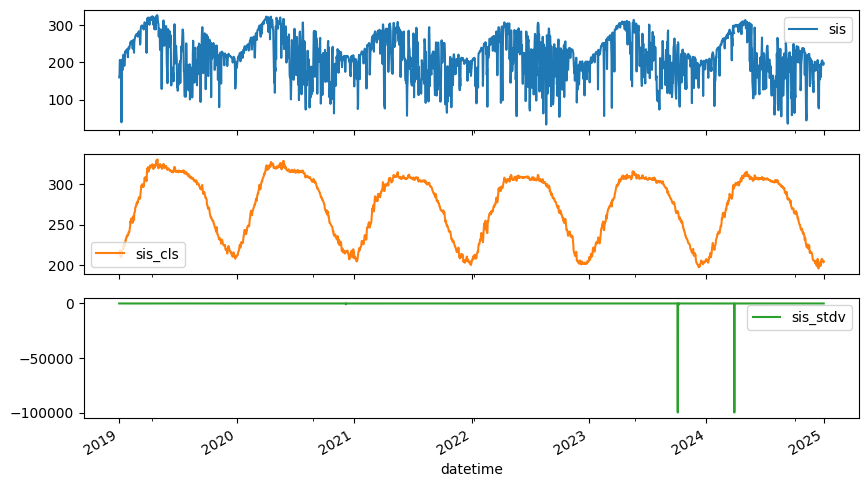

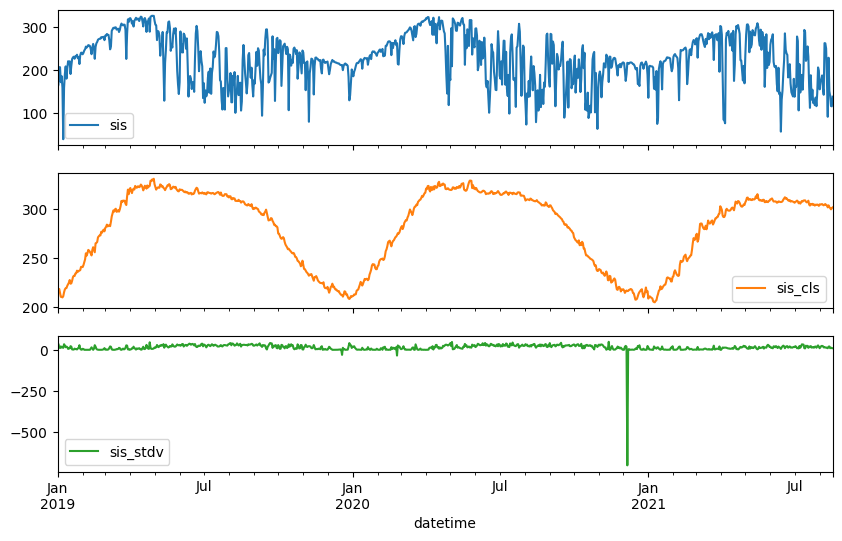

In [11]:
display_all(df)